Definindo as bibliotecas 

In [16]:
import numpy as np
import pandas as pd 
import time
import os
import matplotlib.pyplot as plt 
import seaborn as sns

Definindo os parâmetros

In [17]:
L = 1.0           # Comprimento da barra (m)
u = 0.1           # Velocidade de advecção (m/s)
n = 101           # Número de nós no espaço
dt = 0.05         # Passo de tempo (s)
t_total = 5.0     # Tempo total de simulação (s)

# Condições Físicas
T_init = 20.0  # Temperatura inicial da barra
T_contorno= 100.0 # Condição de contorno em x=0 (Dirichlet)

Definindo função principal

In [ ]:
def adveccao(L,u,n,dt,t_total,T_i,T_cont):
    dx= L/(n-1) 
    C= u*dt/dx
    x= np.linspace(0,L,n)
    t_atual=np.full((n,),T_i)
    t_futuro=np.zeros((n,))
    t_atual[0]= T_cont
    tempos= int(t_total/dt)
    historico = []
    for k in range(tempos):
        for i in range(1,n):
            t_futuro[i]= t_atual[i]- C*(t_atual[i]- t_atual[i-1])
        t_futuro[0]= T_cont
        t_futuro[-1]= t_atual[-2] 
        t_atual= t_futuro.copy()
        historico.append(t_atual.copy())
    return x, historico

Executando a função

In [19]:
x , historico = adveccao(L,u,n,dt,t_total,T_init,T_contorno)
y=np.array(historico)
print(y.shape)
print (y)


(100, 101)
[[100.  60.  20. ...  20.  20.  20.]
 [100.  80.  40. ...  20.  20.  20.]
 [100.  90.  60. ...  20.  20.  20.]
 ...
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]
 [100. 100. 100. ...  20.  20.  20.]]


fazendo dataframe e arquivos com os dados da simulação

In [ ]:
resultados_ns = pd.DataFrame()

fazendo heatmap da dispersão de calor

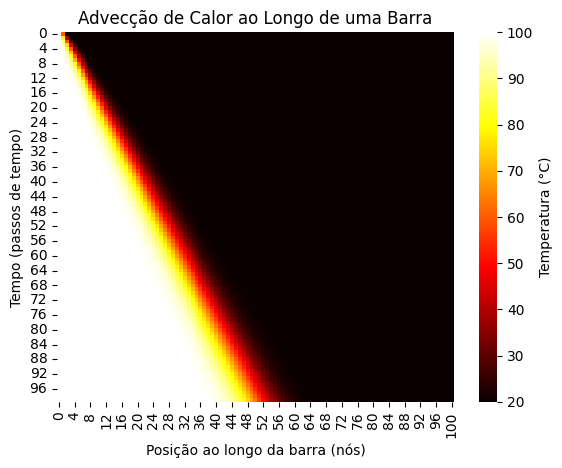

In [20]:
sns.heatmap(y, cmap='hot', cbar_kws={'label': 'Temperatura (°C)'})
plt.xlabel('Posição ao longo da barra (nós)')
plt.ylabel('Tempo (passos de tempo)')
plt.title('Advecção de Calor ao Longo de uma Barra')
plt.show()